# Visualization & Storytelling

### Topic 1: Summary Charts

In [3]:
# CHART 1 : PLayers by maxRuns

/var/folders/rx/bfj9nybj02jf94xlvrjnp9nr0000gn/T/ipykernel_1651/4191583105.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batsmen,x='total_runs',y='player',palette = "Blues_r")


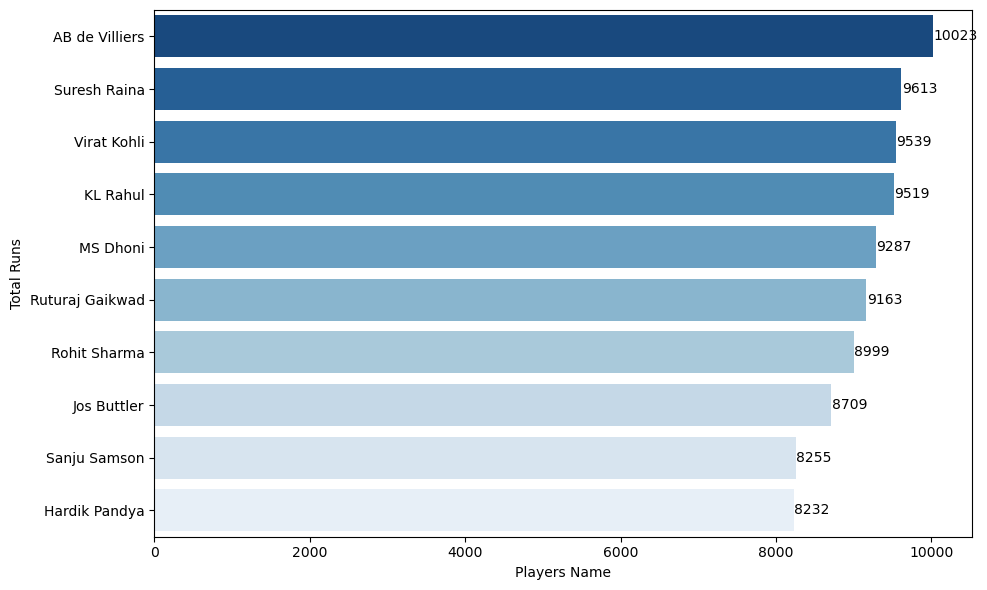

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# --- 1) Load data ---
players_path = "Data/ipl_player_season_runs (1).csv"


df_players = pd.read_csv(players_path)      # columns: player, season, total_runs



# Top 10 batsmen
top_batsmen = (
    df_players.groupby("player", as_index=False)["total_runs"]
      .sum()
      .sort_values("total_runs", ascending=False)
      .head(10)
)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_batsmen,x='total_runs',y='player',palette = "Blues_r")
plt.xlabel("Players Name")
plt.ylabel("Total Runs")

# Annotate bars
# for i, v in enumerate(top_batsmen["total_runs"]):
#     plt.text(v + 5, i, str(v), va="center")

# plt.tight_layout()
# plt.show()


for i,v in enumerate(top_batsmen['total_runs']):
    plt.text(v+5,i,str(v),va='center')
plt.tight_layout()
plt.show()
    



###  Insight

**A clear separation exists between elite performers and the rest. AB de Villiers leads significantly, with a ~400-run gap from the next batsman. After the top 5, the decline in total runs becomes more pronounced.**


### Chart 2: Team Win Percentage Bar Plot

/var/folders/rx/bfj9nybj02jf94xlvrjnp9nr0000gn/T/ipykernel_1651/4249286922.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_perf, x='win_pct', y='team', palette='Greens_r')


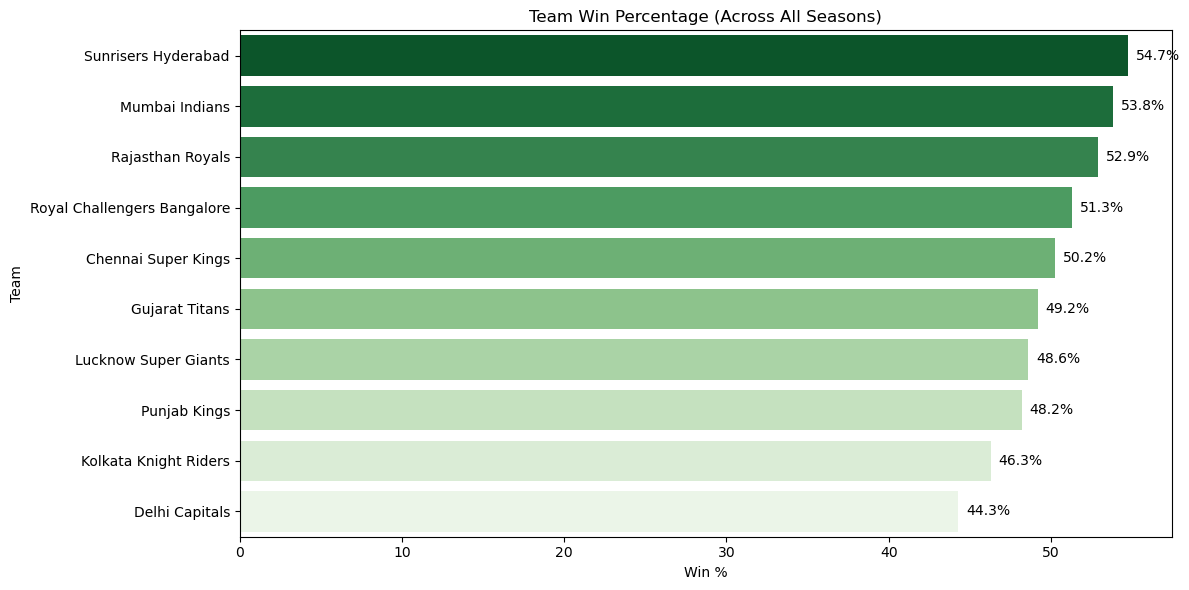

In [3]:
matches_path = "Data/matches_synthetic.csv"
df_matches = pd.read_csv(matches_path)
df_matches.head()
# Step 2 — Calculate matches played per team
team_played = (
    pd.concat([
    df_matches[['team1']].rename(columns={'team1':'team'}),
    df_matches[['team2']].rename(columns={'team2':'team'})
])
    .groupby('team')
    .size()
    .reset_index(name = 'matches_played')
) 

# Step 3 — Calculate matches won per team
team_wins = (
    df_matches.groupby('winner')
    .size()
    .reset_index(name = 'wins')
    .rename(columns={'winner':'team'})
)

# Step 4 — Merge played + wins
team_perf = team_played.merge(team_wins,on='team',how='left')
team_perf['wins'] = team_perf['wins'].fillna(0)
team_perf['win_pct'] = (team_perf['wins'] / team_perf['matches_played']) * 100

# Sort teams by win %
team_perf = team_perf.sort_values('win_pct',ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(data=team_perf, x='win_pct', y='team', palette='Greens_r')

plt.title("Team Win Percentage (Across All Seasons)")
plt.xlabel("Win %")
plt.ylabel("Team")


# Step 6 — Annotate percentages on the bars
for i,v in enumerate(team_perf['win_pct']):
    plt.text(v+0.5,i,f"{v:.1f}%",va= 'center')

# Step 7 — Show plot
plt.tight_layout()
plt.show()



### Insight
“The top three teams—Sunrisers Hyderabad, Mumbai Indians, and Rajasthan Royals—maintain over 52% win rates, demonstrating strong consistency. Teams lower on the list, especially Kolkata Knight Riders and Delhi Capitals, fall significantly behind.”

### Chart 3: Venue Heatmap (Average Total Runs per Season)

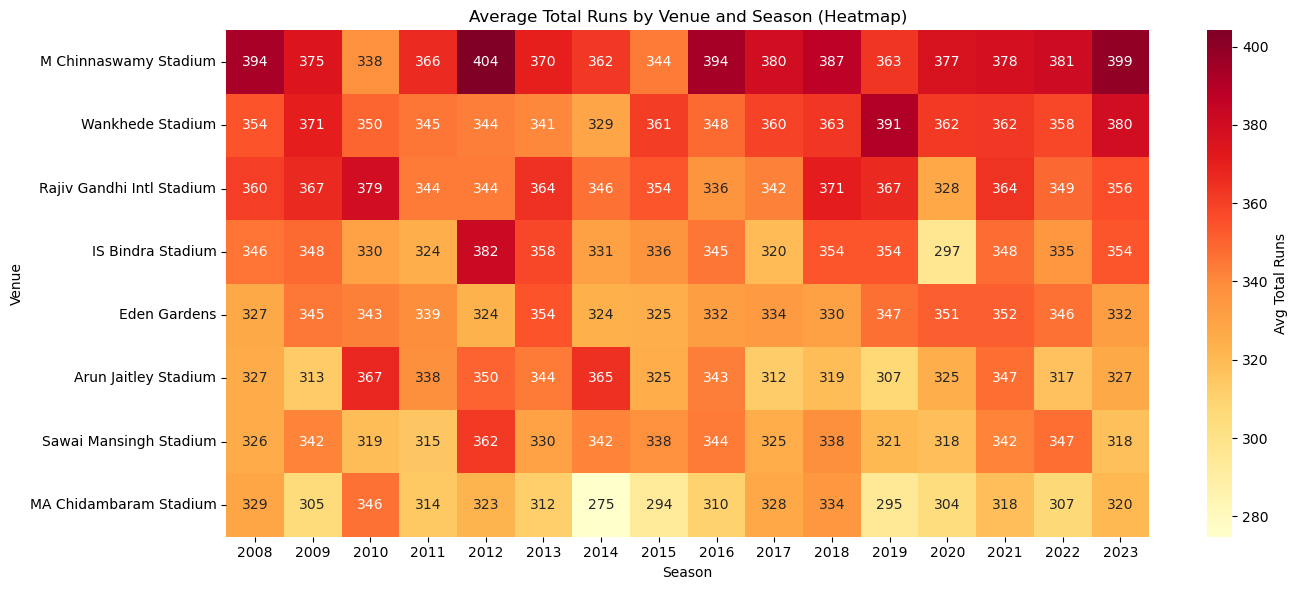

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load matches dataset
df = pd.read_csv("Data/matches_synthetic.csv")
df.head(5)
df['total_runs'] = df['team1_runs'] + df['team2_runs']

# Create pivot table: venue (rows) x season (columns)
venue_season = (
    df.groupby(["venue", "season"])["total_runs"]
      .mean()
      .reset_index()
      .pivot(index="venue", columns="season", values="total_runs")
)

# Sort venues by overall runs (optional)
venue_season = venue_season.loc[venue_season.mean(axis=1).sort_values(ascending=False).index]

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(venue_season, annot=True, fmt=".0f", cmap="YlOrRd", cbar_kws={'label': 'Avg Total Runs'})
plt.title("Average Total Runs by Venue and Season (Heatmap)")
plt.xlabel("Season")
plt.ylabel("Venue")
plt.tight_layout()
plt.show()



### Insights
“M. Chinnaswamy Stadium consistently records the highest total runs, making it one of the most batting-friendly venues. In contrast, MA Chidambaram and Arun Jaitley Stadiums tend to show lower run totals across seasons.”

## Topic 2 : * ML model performance charts (Confusion Matrix, Predicted vs Actual plot)


## ML model performance charts (Confusion Matrix, Predicted vs Actual plot)

In [5]:
# train models, get predictions

In [8]:
# === Prepare data, train models, produce predictions ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the player-season aggregated CSV (path in your workspace)
path = "Data/ipl_player_season_runs (1).csv"
df = pd.read_csv(path)

# quick check
print("Rows:", len(df))
print(df.head())

# 2. Feature(s) and target
# NOTE: we are using 'season' as single feature here (DataFrame shape -> 2D)
X = df[['season']]            # double brackets -> DataFrame
y = df['total_runs']          # Series target

# 3. Train/test split (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train), "Test size:", len(X_test))

# 4. Train models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)

# 5. Predictions on test set
lin_pred = lin_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)

# 6. Quick evaluation printout
lin_rmse = mean_squared_error(y_test, lin_pred, squared=False)
lin_r2 = r2_score(y_test, lin_pred)

rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Linear Regression RMSE: {lin_rmse:.3f}, R²: {lin_r2:.3f}")
print(f"Random Forest RMSE:    {rf_rmse:.3f}, R²: {rf_r2:.3f}")

# now you have: X_train, X_test, y_train, y_test, lin_reg, rf_reg, lin_pred, rf_pred


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Rows: 192
        player  season  total_runs
0  Virat Kohli    2008         180
1  Virat Kohli    2009         796
2  Virat Kohli    2010         689
3  Virat Kohli    2011         494
4  Virat Kohli    2012         489
Train size: 153 Test size: 39
Linear Regression RMSE: 228.792, R²: -0.021
Random Forest RMSE:    241.959, R²: -0.142


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Part 1 — Predicted vs Actual

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


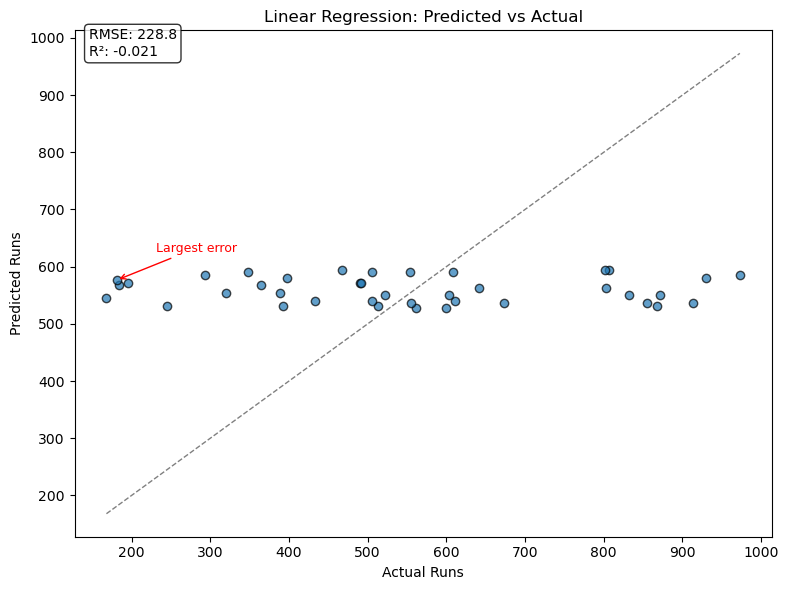

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


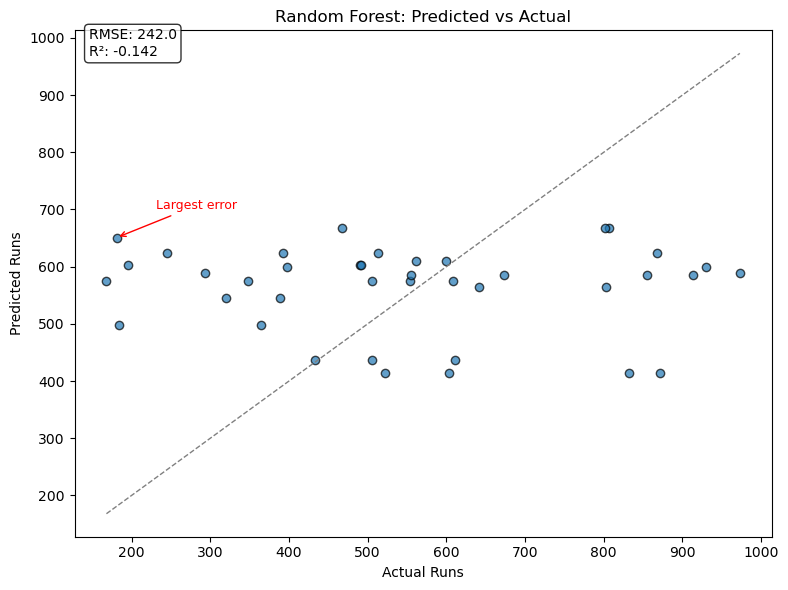

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def plot_predicted_vs_actual(y_true, y_pred, model_name="Model"):
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolor='k')
    # diagonal line for perfect predictions
    min_val = min(y_true.min(), np.min(y_pred))
    max_val = max(y_true.max(), np.max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', linewidth=1, color='gray')
    plt.xlabel("Actual Runs")
    plt.ylabel("Predicted Runs")
    plt.title(f"{model_name}: Predicted vs Actual")

    # annotate RMSE & R2 on the plot
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    plt.text(0.02, 0.95, f"RMSE: {rmse:.1f}\nR²: {r2:.3f}", transform=plt.gca().transAxes,
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    # Annotate the largest absolute residual point
    residuals = (y_true - y_pred).abs()
    idx_max = residuals.idxmax()  # returns index in original y_true (works for pandas Series)
    x_out = y_true.loc[idx_max]
    y_out = float(y_pred[list(y_true.index).index(idx_max)]) if not hasattr(y_pred, 'shape') else y_pred[list(y_true.index).index(idx_max)]
    # safer approach: align prediction array to y_true positions
    # We will annotate using coordinates from the arrays:
    # find position in the test index list
    try:
        pos = list(y_true.index).index(idx_max)
        y_pred_at_pos = y_pred[pos]
        plt.annotate("Largest error", xy=(x_out, y_pred_at_pos), xytext=(x_out+50, y_pred_at_pos+50),
                 arrowprops=dict(arrowstyle="->", color="red"), fontsize=9, color="red")
    except Exception:
        # fallback if positional lookup fails
        pass

    plt.tight_layout()
    plt.show()

# Use the function for both models (run this after training block)
plot_predicted_vs_actual(y_test.reset_index(drop=True), lin_pred, model_name="Linear Regression")
plot_predicted_vs_actual(y_test.reset_index(drop=True), rf_pred, model_name="Random Forest")


### ✔ Insight 2 (Professional)

“Linear Regression consistently predicts values around the 550–600 range, regardless of the true runs. This results in high bias and poor accuracy.”

### Residual Plot

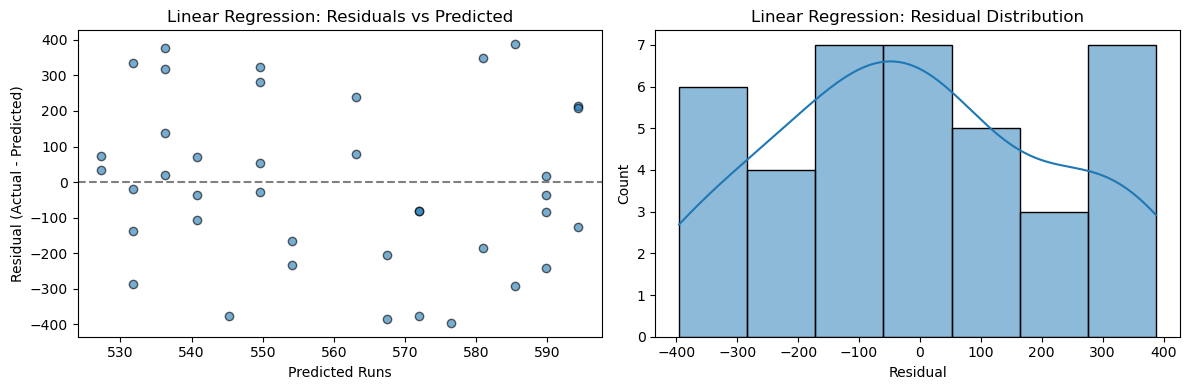

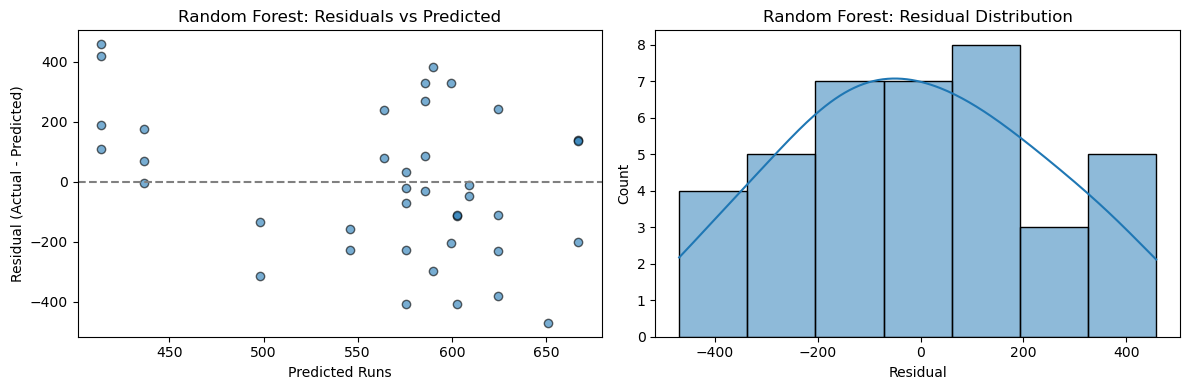

In [6]:
import seaborn as sns
def plot_residuals(y_true,y_pred,model_name='Model'):
# Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute Residuals
    residuals = y_true - y_pred
    plt.figure(figsize=(12,4))
    # 1) Residuals vs Predicted
    # 1) Residuals vs Predicted
    plt.subplot(1,2,1)
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel("Predicted Runs")
    plt.ylabel("Residual (Actual - Predicted)")
    plt.title(f"{model_name}: Residuals vs Predicted")
    
    # 2) Residual Distribution
    plt.subplot(1,2,2)
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residual")
    plt.title(f"{model_name}: Residual Distribution")
    
    plt.tight_layout()
    plt.show()
# Plot for both models
plot_residuals(y_test.reset_index(drop=True), lin_pred, model_name="Linear Regression")
plot_residuals(y_test.reset_index(drop=True), rf_pred, model_name="Random Forest")
    

### ✔ Insights

“Residuals are widely spread and show a clear pattern, indicating the model is underfitting and unable to capture the relationship between features and runs.”

### Confusion Matrix (Topic 2 – Part C)

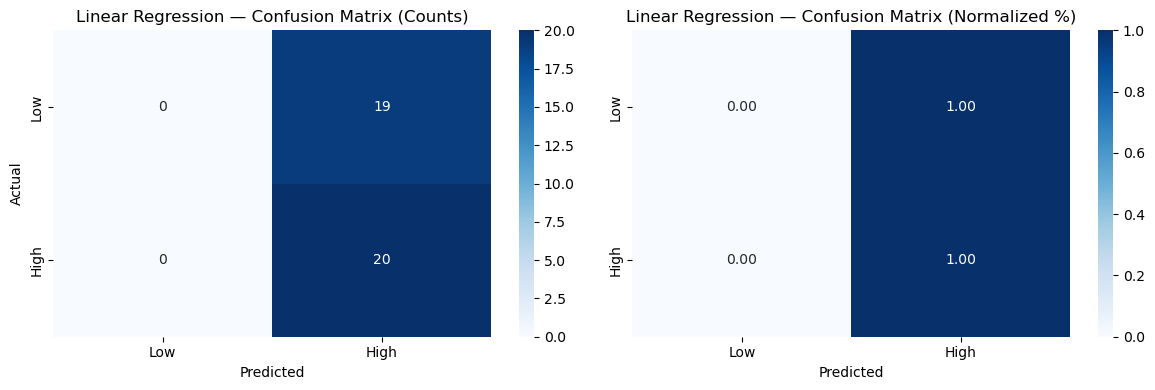

Linear Regression Metrics:
 Accuracy : 0.5128205128205128
 Precision: 0.5128205128205128
 Recall   : 1.0
 F1 Score : 0.6779661016949152


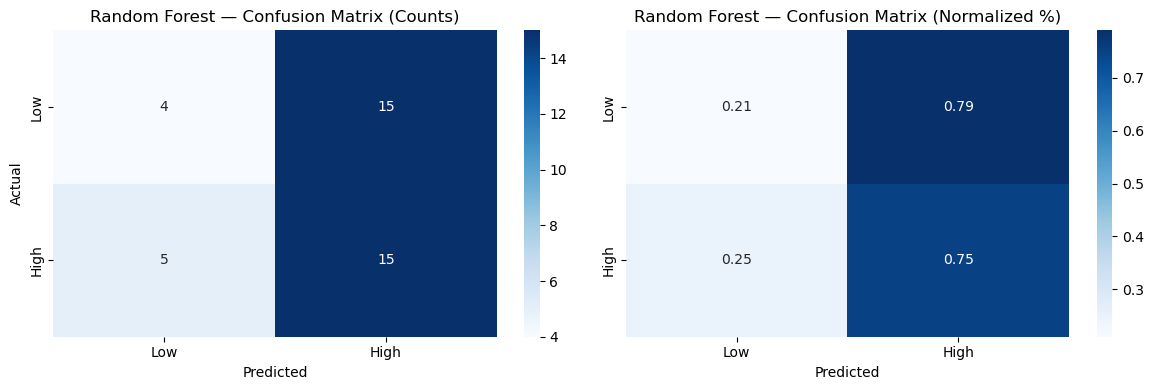

Random Forest Metrics:
 Accuracy : 0.48717948717948717
 Precision: 0.5
 Recall   : 0.75
 F1 Score : 0.6


In [7]:
median_runs = y_test.median()
y_test_class = (y_test >= median_runs).astype(int)
lin_pred_class = (lin_pred >= median_runs).astype(int)
rf_pred_class = (rf_pred >= median_runs).astype(int)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class,lin_pred_class)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def plot_confusion(y_true_class, y_pred_class, labels=["Low","High"], model_name="Model"):
    cm = confusion_matrix(y_true_class, y_pred_class)
    cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    plt.figure(figsize=(12,4))

    # 1) Confusion matrix with counts
    plt.subplot(1,2,1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} — Confusion Matrix (Counts)")

    # 2) Confusion matrix normalized (percentages)
    plt.subplot(1,2,2)
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.title(f"{model_name} — Confusion Matrix (Normalized %)")

    plt.tight_layout()
    plt.show()

    # Print metrics
    print(model_name, "Metrics:")
    print(" Accuracy :", accuracy_score(y_true_class, y_pred_class))
    print(" Precision:", precision_score(y_true_class, y_pred_class, zero_division=0))
    print(" Recall   :", recall_score(y_true_class, y_pred_class, zero_division=0))
    print(" F1 Score :", f1_score(y_true_class, y_pred_class, zero_division=0))
plot_confusion(y_test_class, lin_pred_class, model_name="Linear Regression")
plot_confusion(y_test_class, rf_pred_class, model_name="Random Forest")


### ✔ Insight 2 (Professional)

“Model favors predicting High seasons, resulting in moderate performance for High class but weak accuracy for Low class.”